In [1]:
import pandas as pd

file_path = 'race_prescription.csv'
data = pd.read_csv(file_path)
data.head()

,AnalysisDate,Date Of Death Year,Date Of Death Month,Start Date,End Date,Jurisdiction of Occurrence,Sex,Race/Ethnicity,AgeGroup,AllCause,...,Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,10/13/2021,2019,7,07/01/2019,07/31/2019,United States,M,Other,0-4 years,61,...,0,1,0,1,0,6,0,1,0,0
1,10/13/2021,2019,9,09/01/2019,09/30/2019,United States,F,Other,25-34 years,26,...,0,0,0,0,0,0,1,1,0,0
2,10/13/2021,2020,3,03/01/2020,03/31/2020,United States,Female,Other,0-4 years,40,...,0,1,0,0,0,7,0,0,0,0
3,10/13/2021,2020,3,03/01/2020,03/31/2020,United States,Female,Other,5-14 years,6,...,0,1,0,0,0,0,0,0,0,0
4,10/13/2021,2020,3,03/01/2020,03/31/2020,United States,Female,Other,15-24 years,14,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# Drop the columns not in use
columns_to_drop = ['AnalysisDate', 'Start Date', 'End Date', 'Jurisdiction of Occurrence']
data.drop(columns=columns_to_drop, inplace=True)

# Filter out data from 2019
data = data[data['Date Of Death Year'] != 2019]

# Clean the Sex column
data.loc[data['Sex'] == 'M', 'Sex'] = 'Male'
data.loc[data['Sex'] == 'F', 'Sex'] = 'Female'

data.head()

/var/folders/wh/wt_6s1r91rggmpy_dw059jpw0000gn/T/ipykernel_55401/1118090585.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = data['Sex'].replace({'M': 'Male', 'F': 'Female'})


,Date Of Death Year,Date Of Death Month,Sex,Race/Ethnicity,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
2,2020,3,Female,Other,0-4 years,40,35,0,0,0,0,1,0,0,0,7,0,0,0,0
3,2020,3,Female,Other,5-14 years,6,4,1,0,0,0,1,0,0,0,0,0,0,0,0
4,2020,3,Female,Other,15-24 years,14,2,0,0,0,0,0,0,0,0,1,0,0,0,0
5,2021,4,Male,Other,0-4 years,49,42,0,0,0,0,0,0,0,0,6,0,0,1,1
1444,2020,1,Female,Hispanic,0-4 years,198,181,3,5,0,0,6,0,4,1,13,1,1,0,0


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the COVID-19 risk score (as done previously)
data['COVID_Deaths'] = data['COVID-19 (U071, Multiple Cause of Death)'] + data['COVID-19 (U071, Underlying Cause of Death)']
data['Total_Deaths'] = data['AllCause']
data['COVID_Risk_Score'] = data['COVID_Deaths'] / data['Total_Deaths']

# Label groups as 'risky' (1) or 'not risky' (0) based on a threshold
threshold = data['COVID_Risk_Score'].mean()  # Example threshold
data['Risk_Label'] = (data['COVID_Risk_Score'] > threshold).astype(int)

# Prepare features and labels
X = data[['AgeGroup', 'Race/Ethnicity']]  # Consider including other relevant features
y = data['Risk_Label']

# Encode categorical variables
X_encoded = pd.get_dummies(X, columns=['AgeGroup', 'Race/Ethnicity'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Train the SVM classifier
svm_model = SVC(kernel='linear', probability=True)  # Linear kernel
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')


Model Accuracy: 0.75


/var/folders/wh/wt_6s1r91rggmpy_dw059jpw0000gn/T/ipykernel_55401/3504251249.py:2: FutureWarning: The provided callable <function mean at 0x124383060> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data_race = data.pivot_table(index='AgeGroup', columns='Race/Ethnicity', values='Risk_Label', aggfunc=np.mean)


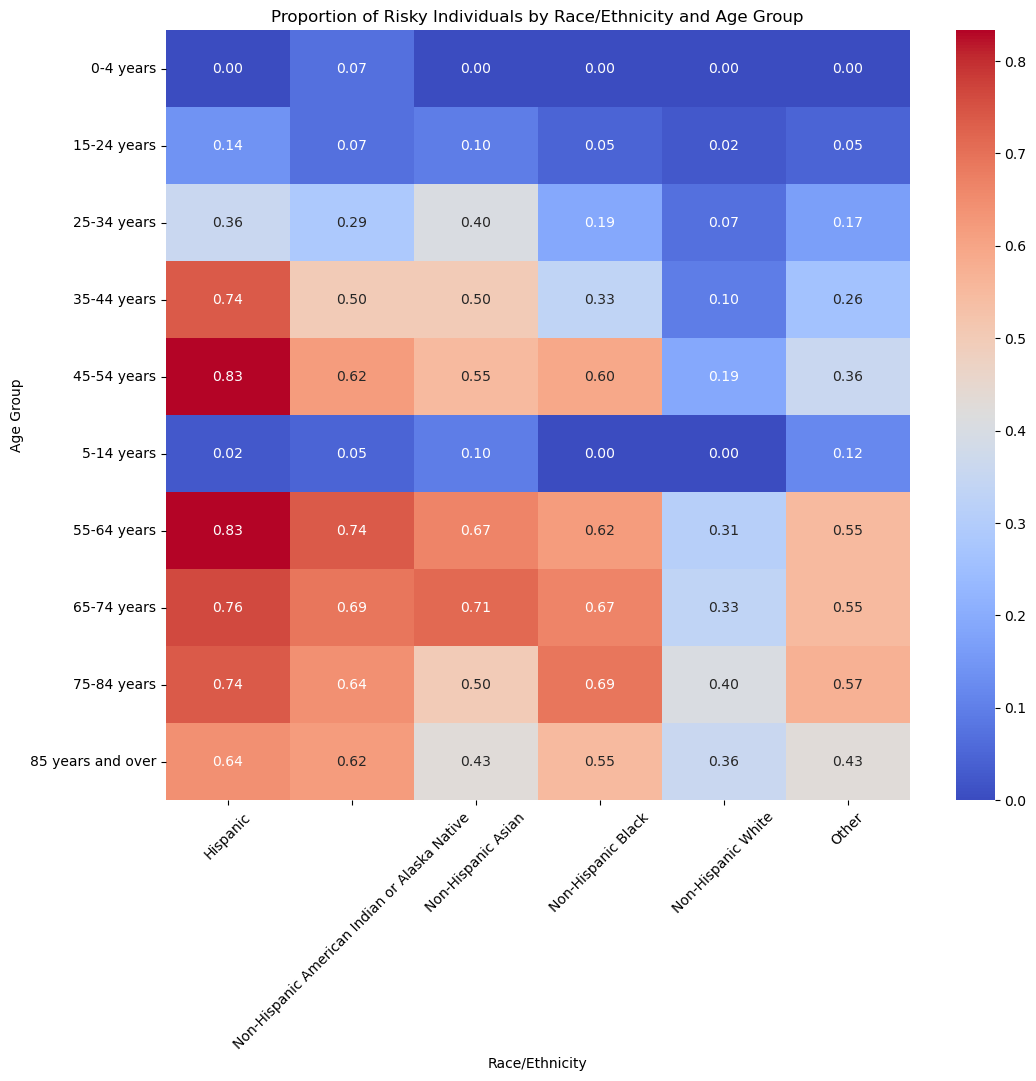

In [21]:
# Assuming 'Race/Ethnicity' is a column in your data, pivot the data for the heatmap
heatmap_data_race = data.pivot_table(index='AgeGroup', columns='Race/Ethnicity', values='Risk_Label', aggfunc=np.mean)

# Create the heatmap for race/ethnicity data
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data_race, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Proportion of Risky Individuals by Race/Ethnicity and Age Group')
plt.ylabel('Age Group')
plt.xlabel('Race/Ethnicity')
plt.xticks(rotation=45)  # Adjust rotation if necessary
plt.show()



In [22]:
# Calculate the COVID-19 risk score again (if necessary)
data['COVID_Risk_Score'] = data['COVID_Deaths'] / data['Total_Deaths']

# Adjust the threshold for classifying a group as 'risky'
threshold = data['COVID_Risk_Score'].mean()
data['Risk_Label'] = (data['COVID_Risk_Score'] > threshold).astype(int)

# Prepare features and labels, focusing on 'Sex' this time
X = data[['Sex']]  # This time we're only considering the sex of individuals
y = data['Risk_Label']

# Encode categorical variables (if 'Sex' is not already numeric)
le = LabelEncoder()
X_encoded = le.fit_transform(X['Sex']).reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# No need to scale features in this case, as we have only one binary feature

In [23]:
# Train the SVM classifier
svm_model = SVC(kernel='linear')  # Linear kernel might be sufficient here
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')


Model Accuracy: 0.61


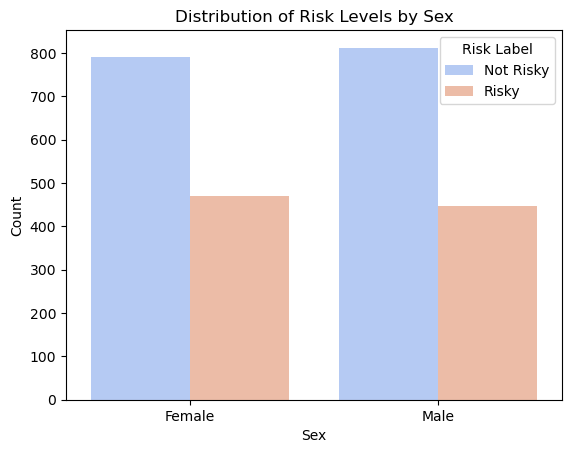

In [24]:
# Plot the distribution of risk levels by sex
sns.countplot(data=data, x='Sex', hue='Risk_Label', palette='coolwarm')
plt.title('Distribution of Risk Levels by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Risk Label', labels=['Not Risky', 'Risky'])
plt.show()


In [14]:
# Count the number of risky vs. not risky individuals within each combination of Sex and AgeGroup
risk_counts = data.groupby(['Sex', 'AgeGroup', 'Risk_Label']).size().unstack(fill_value=0)

# Convert the counts to a "risky proportion" for better comparison
# This is optional and depends on whether you want to visualize absolute counts or proportions
risk_proportion = risk_counts.div(risk_counts.sum(axis=1), axis=0)

# Reset index to make 'Sex' and 'AgeGroup' into columns again for easy plotting
risk_proportion.reset_index(inplace=True)


/var/folders/wh/wt_6s1r91rggmpy_dw059jpw0000gn/T/ipykernel_55401/1133533248.py:7: FutureWarning: The provided callable <function mean at 0x124383060> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = data.pivot_table(index='AgeGroup', columns='Sex', values='Risk_Label', aggfunc=np.mean)


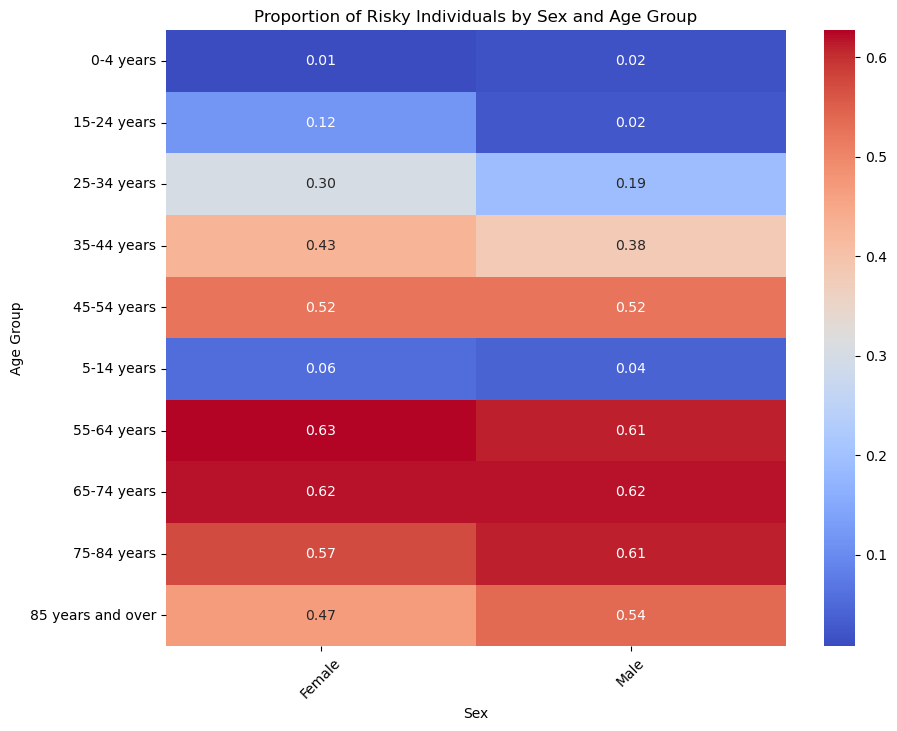

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data for heatmap; rows will be AgeGroup, columns will be Sex, and values will be the proportion of risky individuals
# Corrected approach using pivot_table for creating the heatmap data
heatmap_data = data.pivot_table(index='AgeGroup', columns='Sex', values='Risk_Label', aggfunc=np.mean)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Proportion of Risky Individuals by Sex and Age Group')
plt.ylabel('Age Group')
plt.xlabel('Sex')
plt.xticks(rotation=45)  # In case the Sex labels are not properly aligned
plt.show()
